In [106]:
##universal setting 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
from shapely import wkt
from sklearn import preprocessing
import seaborn as sns

In [18]:
# data location
read_location="C:/Selina/Class/(DS_MS)/Capstone/DataSet/"
save_location="C:/Selina/Class/(DS_MS)/Capstone/Result/"
#plot color setting (https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)
my_cmap=plt.cm.get_cmap("Pastel2")
#for geopandas setting
crs={'init': 'epsg:4326'}

In [19]:
#import data
data_metro=gpd.read_file(read_location+"Subway_Stations.geojson",crs=crs)
data_museum=gpd.read_file(read_location+"New_York_City_Museums.geojson",crs=crs)

data=pd.read_csv(read_location+"AB_NYC_2019.csv")
print(data.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [10]:
data_museum.head(3)

,city,name,tel,zip,url,address2,adress1,geometry
0,New York,Alexander Hamilton U.S. Custom House,(212) 514-3700,10004.0,http://www.oldnycustomhouse.gov/,,1 Bowling Grn,POINT (-74.01375579519738 40.70381621691804)
1,Staten Island,Alice Austen House Museum,(718) 816-4506,10305.0,http://www.aliceausten.org/,,2 Hylan Blvd,POINT (-74.06303178855111 40.61512083775536)
2,New York,American Academy of Arts and Letters,(212) 368-5900,10032.0,http://www.artsandletters.org/,,633 W. 155th St.,POINT (-73.94729768541572 40.83385350075331)


In [7]:
data_metro.head(3)

,name,url,line,objectid,notes,geometry
0,Astor Pl,http://web.mta.info/nyct/service/,4-6-6 Express,1,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-73.99106999861966 40.73005400028978)
1,Canal St,http://web.mta.info/nyct/service/,4-6-6 Express,2,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-74.00019299927328 40.71880300107709)
2,50th St,http://web.mta.info/nyct/service/,1-2,3,"1-all times, 2-nights",POINT (-73.98384899986625 40.76172799961419)


In [8]:
gdf_airbnb= gpd.GeoDataFrame(data.drop(['latitude', 'longitude'], axis=1),crs=crs,
                       geometry=data.apply(lambda row: shapely.geometry.Point((row.longitude, row.latitude)), axis=1))

In [9]:
gdf_airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (-73.98376999999999 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365,POINT (-73.9419 40.80902)


In [26]:
gdf_airbnb["geometry"]
for i ,point in enumerate(gdf_airbnb["geometry"]):
    if i==0:
        print(data_metro.distance(point).min())
        print(i,point)
#data_metro.distance(gdf_airbnb.loc[["geometry"]][0])

3936159.704702377
0 POINT (3742549.198234159 1219108.5989754)


In [12]:
print(data_metro.crs)
print(gdf_airbnb.crs)


{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


In [13]:
#https://gis.stackexchange.com/questions/293310/how-to-use-geoseries-distance-to-get-the-right-answer/293342
#add distance to the nearest metro
#distance by meters
gdf_aibnb_km=gdf_airbnb.to_crs(epsg=3310,inplace=True)
data_metro_km=data_metro.to_crs(epsg=3310,inplace=True)
data_km=data
data_km["distance to the nearest metro"]=gdf_airbnb["geometry"].apply(lambda row: data_metro.distance(row).min())
data_km.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance to the nearest metro
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,465.387704
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,93.434732
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,334.408650


In [14]:
print(data_metro.crs)
print(gdf_airbnb.crs)

{'init': 'epsg:3310', 'no_defs': True}
{'init': 'epsg:3310', 'no_defs': True}


In [21]:
##add distance to the nearest metro
#distance by meters
data_museum.to_crs(epsg=3310,inplace=True)
print(data_museum.crs)

{'init': 'epsg:3310', 'no_defs': True}


In [33]:
#define function
def num_muse(point,km):
    dist_museum=data_museum.distance(point)
    num=sum(dist_museum<=km)
    return num

In [34]:
data_km["number of museum within 500"]=gdf_airbnb["geometry"].apply(lambda row: num_muse(row,500))

In [35]:
data_km.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance to the nearest metro,number of museum within 500
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,465.387704,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,93.434732,3
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,334.408650,1


In [71]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="googlev3")
location = geolocator.geocode("Statue of Liberty")
print(location.address)
print(location.latitude, location.longitude)

Statue of Liberty, Flagpole Plaza, Manhattan Community Board 1, Manhattan, New York County, NYC, New York, 10004, United States of America
40.6892532 -74.0445481714432


In [78]:
#top 10 popular scene
top_10=["Statue of Liberty","Central Park","Rockefeller Center","Metropolitan Museum of Art","Shubert Alley"
       ,"Empire State Building","9/11 Memorial and Museum","High Line","Times Square","Brooklyn Bridge"]
pd_top10={"rank":range(1,len(top_10)+1),"name":top_10}
pd_top10=pd.DataFrame(pd_top10)
print(pd_top10.head(3))

   rank                name
0     1   Statue of Liberty
1     2        Central Park
2     3  Rockefeller Center


In [56]:
def detail_GIS(text,num):
    location = geolocator.geocode(text)
    lon=float(location.longitude)
    lat=float(location.latitude)
    address=location.address
    a=[lon,lat,address][num]
    return a

In [77]:
#top_10["longitude"]
for i in top_10:
    location = geolocator.geocode(i)
    print(i,"_____",location.longitude)
    print("--------------------------")
#a = pd_top10["name"].map(lambda row:detail_GIS(row,0))
print(a)

Statue of Liberty _____ -74.0445481714432
--------------------------
Central Park _____ -73.9645715841571
--------------------------
Rockefeller Center _____ -73.9799568611638
--------------------------
Metropolitan Museum of Art _____ -73.9633641138519
--------------------------
Shubert Alley _____ -73.9867726
--------------------------
Empire State Building _____ -73.9856546198733
--------------------------
9/11 Memorial and Museum _____ -74.0126374430329
--------------------------
High Line _____ -74.0048911708541
--------------------------
Times Square _____ -73.9858550354592
--------------------------
Brooklyn Bridge _____ -73.9969304206658
--------------------------
0             Statue of Liberty
1                  Central Park
2            Rockefeller Center
3    Metropolitan Museum of Art
4        Broadway Shubert Alley
5         Empire State Building
6      9/11 Memorial and Museum
7                     High Line
8                  Times Square
9               Brooklyn Bridge

In [81]:
pd_top10["longitude"] = pd_top10["name"].map(lambda row:detail_GIS(row,0))
pd_top10["latitude"] = pd_top10["name"].map(lambda row:detail_GIS(row,1))
pd_top10["address"] = pd_top10["name"].map(lambda row:detail_GIS(row,2))

In [85]:
print(pd_top10.head(3))
gdf_top10= gpd.GeoDataFrame(pd_top10.drop(['latitude', 'longitude'], axis=1),crs=crs,
                       geometry=data.apply(lambda row: shapely.geometry.Point((row.longitude, row.latitude)), axis=1))
gdf_top10.to_crs(epsg=3310,inplace=True)
print(gdf_top10.head())

   rank                name  longitude   latitude  \
0     1   Statue of Liberty -74.044548  40.689253   
1     2        Central Park -73.964572  40.783848   
2     3  Rockefeller Center -73.979957  40.759258   

                                             address  
0  Statue of Liberty, Flagpole Plaza, Manhattan C...  
1  Central Park, Manhattan, New York County, NYC,...  
2  Rockefeller Center, 45, Rockefeller Plaza, Mid...  
   rank                        name  \
0     1           Statue of Liberty   
1     2                Central Park   
2     3          Rockefeller Center   
3     4  Metropolitan Museum of Art   
4     5               Shubert Alley   

                                             address  \
0  Statue of Liberty, Flagpole Plaza, Manhattan C...   
1  Central Park, Manhattan, New York County, NYC,...   
2  Rockefeller Center, 45, Rockefeller Plaza, Mid...   
3  The Met, 1000, 5th Avenue, Manhattan Community...   
4  Shubert Alley, Times Square, Theater District,...

In [86]:
data_km["distance to the nearest popular scene"]=gdf_airbnb["geometry"].apply(lambda row: gdf_top10.distance(row).min())

In [87]:
data_km.to_csv(read_location+"AB_NYC_2019_GIS_km_3.csv",index=False)
data_km.describe().to_csv(save_location+"GIS_km_summary_3.csv",index=True)
data_km.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance to the nearest metro,number of museum within 500,distance to the nearest popular scene
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,471.873197,0.583536,2831.134805
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,845.174836,1.301554,2989.973692
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.907626,0.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,202.666663,0.000000,1094.858492
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,314.123081,0.000000,2020.346189
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,468.187778,1.000000,3201.654456
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,22012.718775,8.000000,28032.483075


In [89]:
#define function
def num_top(point,km):
    dist_museum=gdf_top10.distance(point)
    num=sum(dist_museum<=km)
    return num

In [90]:
data_km["number of top10 within"]=gdf_airbnb["geometry"].apply(lambda row: num_top(row,500))

In [99]:
data_km.rename(columns={"number of top10 within":"number of top10 within 500"},inplace=True)
data_km["number of top10 within 500"].head(3)

0    1
1    1
2    1
Name: number of top10 within 500, dtype: int64

In [120]:
#correct subarea
nbhoods = pd.read_csv(read_location+"nynta.csv")
#nbhoods.rename(columns={'NTAName':'neighbourhood'}, inplace=True)
print(nbhoods.head(3))
nbhoods['the_geom'] = nbhoods['the_geom'].apply(wkt.loads)
gdp_nbhoods = gpd.GeoDataFrame(nbhoods, geometry='the_geom',crs=crs)
print("gdp-------------------------------------")
print(gdp_nbhoods.head(3))

                                            the_geom  BoroCode  CountyFIPS  \
0  MULTIPOLYGON (((-73.97604935657381 40.63127590...         3          47   
1  MULTIPOLYGON (((-73.80379022888246 40.77561011...         4          81   
2  MULTIPOLYGON (((-73.8610972440186 40.763664477...         4          81   

   BoroName NTACode        NTAName    Shape_Leng    Shape_Area  
0  Brooklyn    BK88   Borough Park  39247.228074  5.400502e+07  
1    Queens    QN51    Murray Hill  33266.904811  5.248828e+07  
2    Queens    QN27  East Elmhurst  19816.711538  1.972685e+07  
gdp-------------------------------------
                                            the_geom  BoroCode  CountyFIPS  \
0  (POLYGON ((-73.97604935657381 40.6312759056467...         3          47   
1  (POLYGON ((-73.80379022888246 40.7756101117924...         4          81   
2  (POLYGON ((-73.86109724401859 40.7636644770877...         4          81   

   BoroName NTACode        NTAName    Shape_Leng    Shape_Area  
0  Brook

In [145]:
print(gdf_airbnb.crs)
print(gdp_nbhoods.crs)
gdf_airbnb.to_crs(epsg=4326,inplace=True)
print(gdf_airbnb.crs)
print(gdp_nbhoods.crs)
gdf_airbnb.index
#data_nbh_temp=gpd.sjoin(gdf_airbnb,gdp_nbhoods,how="inner", op='intersects')
#print(data_nbh_temp)

{'init': 'epsg:4326', 'no_defs': True}
{'init': 'epsg:4326'}
{'init': 'epsg:4326', 'no_defs': True}
{'init': 'epsg:4326'}


RangeIndex(start=0, stop=48895, step=1)

In [162]:
print(gdp_nbhoods.head(3))
data_nbh_temp=gpd.sjoin(gdf_airbnb,gdp_nbhoods,how="inner", op='intersects')
print(data_nbh_temp.head(3))
#data_nbh_temp.to_file(save_location+"Test.geojson", driver='GeoJSON')

                                            the_geom  BoroCode  CountyFIPS  \
0  (POLYGON ((-73.97604935657381 40.6312759056467...         3          47   
1  (POLYGON ((-73.80379022888246 40.7756101117924...         4          81   
2  (POLYGON ((-73.86109724401859 40.7636644770877...         4          81   

   BoroName NTACode        NTAName    Shape_Leng    Shape_Area  
0  Brooklyn    BK88   Borough Park  39247.228074  5.400502e+07  
1    Queens    QN51    Murray Hill  33266.904811  5.248828e+07  
2    Queens    QN27  East Elmhurst  19816.711538  1.972685e+07  


C:\Users\Selina\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


        id                                name  host_id host_name  \
0     2539  Clean & quiet apt home by the park     2787      John   
25    8505  Sunny Bedroom Across Prospect Park    25326   Gregory   
226  58062                   South Slope Green   277394     Linda   

    neighbourhood_group    neighbourhood     room_type  price  minimum_nights  \
0              Brooklyn       Kensington  Private room    149               1   
25             Brooklyn  Windsor Terrace  Private room     60               1   
226            Brooklyn  Windsor Terrace  Private room    135               2   

     number_of_reviews  ... availability_365  \
0                    9  ...              365   
25                  19  ...               85   
226                 21  ...              272   

                                         geometry  index_right  BoroCode  \
0    POINT (-73.97237000000001 40.64749000000001)          100         3   
25            POINT (-73.97519 40.65599000000001)    

In [194]:
data_nbh_temp[data_nbh_temp["NTAName"].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,...,availability_365,geometry,index_right,BoroCode,CountyFIPS,BoroName,NTACode,NTAName,Shape_Leng,Shape_Area


(48895, 15)
(48883, 23)
(48895, 20)
      neighbourhood_group  latitude  longitude  \
4477             Brooklyn  40.70481  -73.97755   
37494              Queens  40.60513  -73.77024   
42760               Bronx  40.90484  -73.84489   
43764               Bronx  40.90406  -73.86286   
44052              Queens  40.69955  -73.72247   
46263              Queens  40.68205  -73.72581   
46966              Queens  40.77444  -73.73373   
47133           Manhattan  40.74336  -73.97143   
47790               Bronx  40.91234  -73.89417   
47957           Manhattan  40.75003  -74.01455   
48029               Bronx  40.91306  -73.89389   
48033               Bronx  40.91167  -73.89566   

                                                    name  
4477                          Cute and cozy in Manhattan  
37494                            Queens home with a view  
42760                                          The Sweet  
43764                               Comfy basement suite  
44052       Beauti

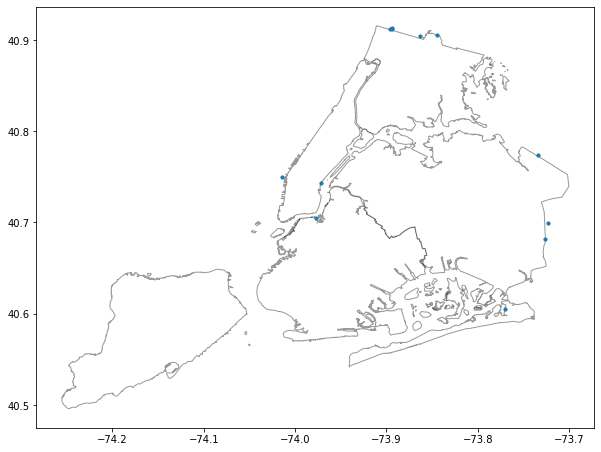

In [191]:
## http://geojson.io/#map=11/40.7592/-73.8683
print(gdf_airbnb.shape)
print(data_nbh_temp.shape)
print(data_km.shape)
dta_temp=data_km.join(data_nbh_temp[["id","NTAName"]].set_index("id"),on="id",how="left")
dta_temp[["neighbourhood_group","neighbourhood","NTAName"]][dta_temp["NTAName"].isnull()]
a=dta_temp[["neighbourhood_group",'latitude', 'longitude',"name"]][dta_temp["NTAName"].isnull()]
print(a)
dta_temp_jason=gpd.GeoDataFrame(a.drop(['latitude', 'longitude'], axis=1),crs=crs,
                       geometry=a.apply(lambda row: shapely.geometry.Point((row.longitude, row.latitude)), axis=1))
dta_temp_jason.to_file(save_location+"points_Outof_NY.geojson", driver='GeoJSON')

nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
import pyproj
print (pyproj.__version__)
#pyproj.Proj("+init=epsg:4326")

nyc = nyc.to_crs(epsg=4326)
nyc=nyc.sort_values(by="BoroName")

fig,ax = plt.subplots(figsize=(10,10))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black',color="white")
dta_temp_jason.plot(ax=ax,markersize=10)
plt.show()



#print(gdf_airbnb.head(3))
#print(data_nbh_temp[["neighbourhood","NTAName"]].head(5))
#print(data_nbh_temp[["neighbourhood","NTAName"]].nunique())
#data_nbh_temp=data_nbh_temp[["id","NTAName"]]
#print(data_nbh_temp.nunique())
#print(data_km[["id"]].nunique())


In [222]:
#remove ooutlinear, location can not be identified
data_km=data_km.join(data_nbh_temp[["id","NTAName"]].set_index("id"),on="id",how="left")
data_km=data_km[data_km["NTAName"].isnull()!=True]
data_km.shape

(48883, 21)

In [287]:
data_km.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'distance to the nearest metro',
       'number of museum within 500', 'distance to the nearest popular scene',
       'number of top10 within 500', 'NTAName', 'review this year'],
      dtype='object')

In [286]:
#review date (in this year(dateset end with 2019/Augest))
name_6="last_review"
name_temp="review this year"
#print(data_km.head(3))
dta_temp=data_km[[name_6,"id"]]
dta_temp[name_6]=pd.to_datetime(dta_temp[name_6],dayfirst=True)
dta_temp["year"]=dta_temp[name_6].apply(lambda x:float(x.year))
dta_temp[name_temp]=0
dta_temp.loc[dta_temp["year"]==2019,name_temp]=1
print(dta_temp.head(3))
data_km=data_km.join(dta_temp[["id",name_temp]].set_index("id"),on="id",how="left")

C:\Users\Selina\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


  last_review    id    year  review this year
0  2018-10-19  2539  2018.0                 0
1  2019-05-21  2595  2019.0                 1
2         NaT  3647     NaN                 0


C:\Users\Selina\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Selina\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Selina\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [289]:
data_km.to_csv(read_location+"AB_NYC_2019_GIS_km_all.csv",index=False)
data_km.describe().to_csv(save_location+"GIS_km_summary_all.csv",index=True)
print(data_km.describe())
data_km.NTAName.nunique()

                 id       host_id      latitude     longitude         price  \
count  4.888300e+04  4.888300e+04  48883.000000  48883.000000  48883.000000   
mean   1.901395e+07  6.759680e+07     40.728933    -73.952193    152.725201   
std    1.098168e+07  7.859281e+07      0.054502      0.046114    240.179299   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.470616e+06  7.816856e+06     40.690095    -73.983080     69.000000   
50%    1.967574e+07  3.078690e+07     40.723070    -73.955680    106.000000   
75%    2.914846e+07  1.074344e+08     40.763105    -73.936295    175.000000   
max    3.648724e+07  2.743213e+08     40.911690    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48883.000000       48883.000000       38835.000000   
mean         7.028947          23.279300           1.373231   
std         20.509211          44.554763           1.680525   
min          1.000000           0.00

191